In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('datasets_19_420_Iris.csv', index_col=0) 

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

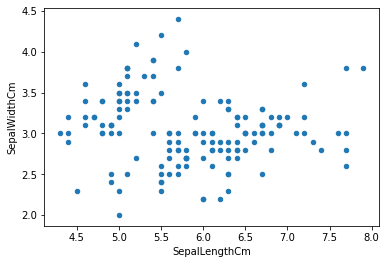

In [11]:
df.plot(kind = 'scatter', x = "SepalLengthCm", y="SepalWidthCm")

In [13]:
import seaborn as sns

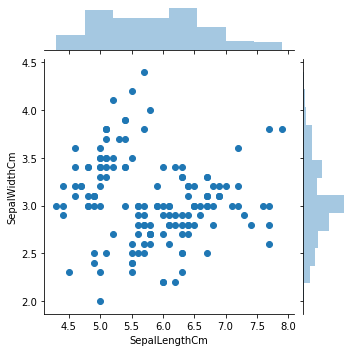

In [17]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, height=5)

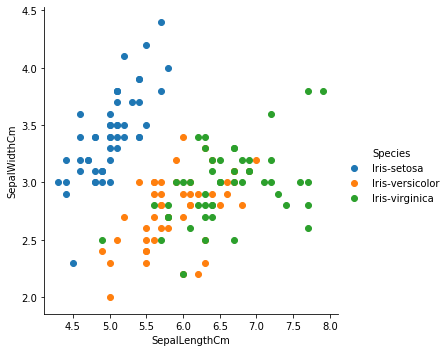

In [21]:
sns.FacetGrid(df, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend() 

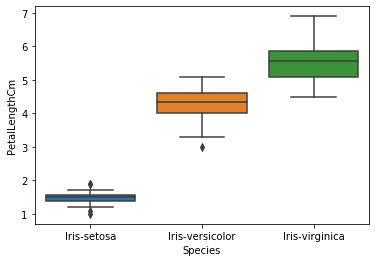

In [22]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

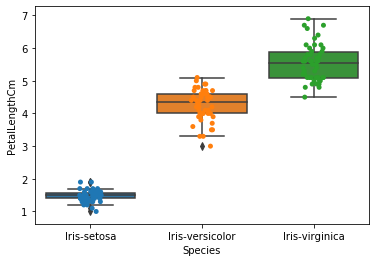

In [29]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

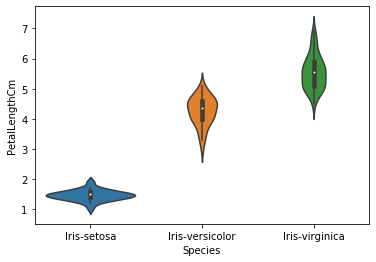

In [33]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=8)


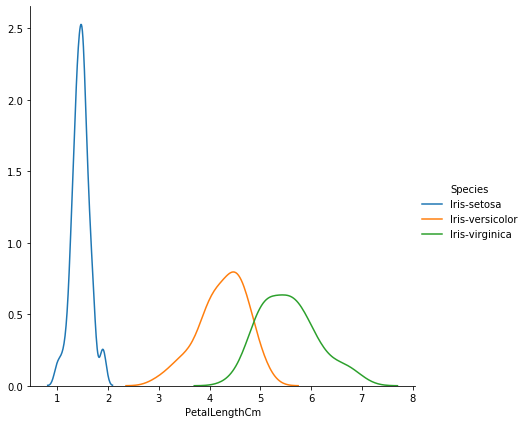

In [39]:
sns.FacetGrid(df, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

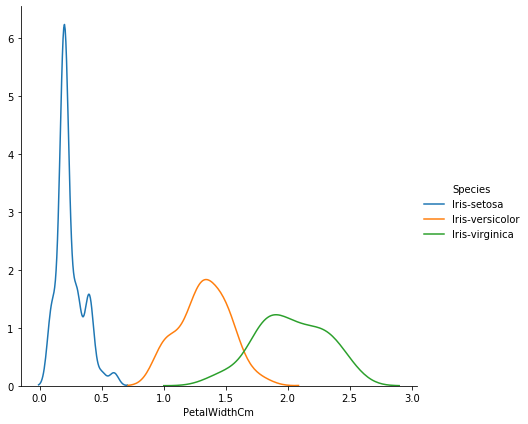

In [37]:
sns.FacetGrid(df, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalWidthCm") \
   .add_legend()

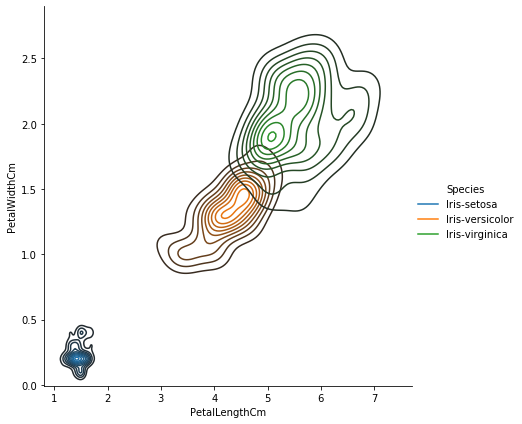

In [40]:
sns.FacetGrid(df, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

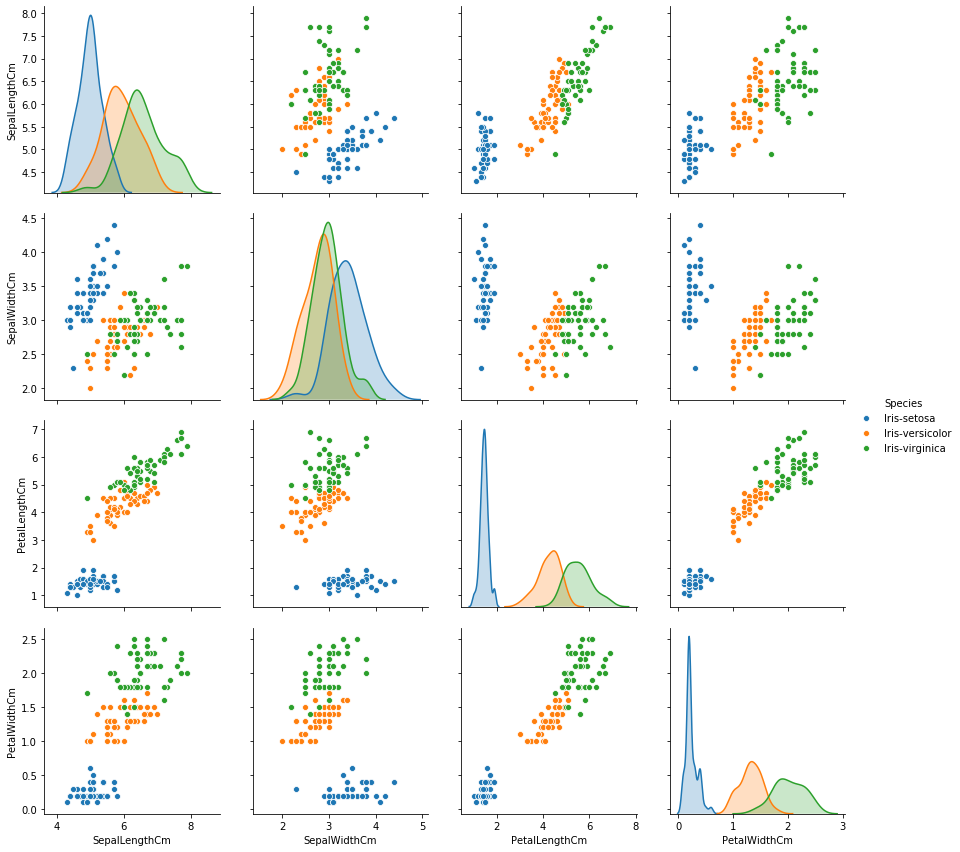

In [43]:
sns.pairplot(df, hue="Species", height=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A1FED6A20>,
      dtype=object)

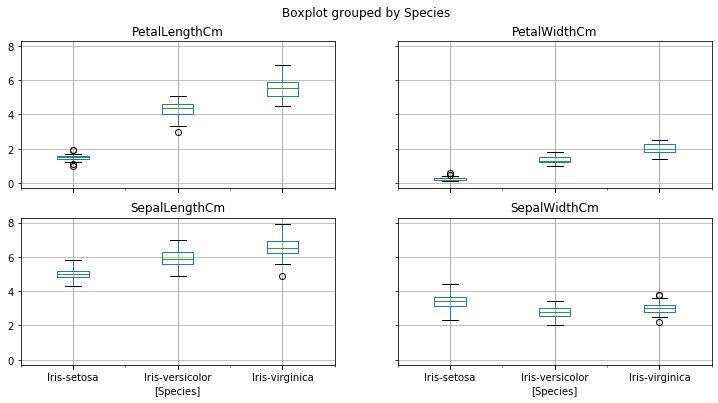

In [46]:
df.boxplot(by = 'Species' ,figsize=(12,6))

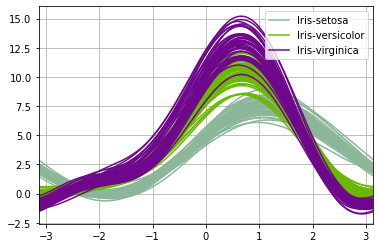

In [48]:
pd.plotting.andrews_curves(df, "Species")

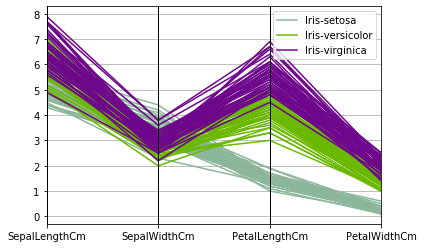

In [49]:
pd.plotting.parallel_coordinates(df, "Species")

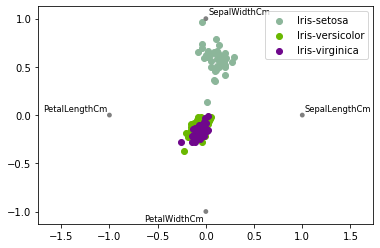

In [50]:
pd.plotting.radviz(df, "Species")

In [57]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [58]:
X = df.drop(['Species'], axis=1)
y = df['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [65]:
model = LogisticRegression()

In [67]:
model.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
y_pred = model.predict(x_test)

In [69]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

92.10526315789474

In [83]:
model.predict([[1,1,1,1]])

array(['Iris-virginica'], dtype=object)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

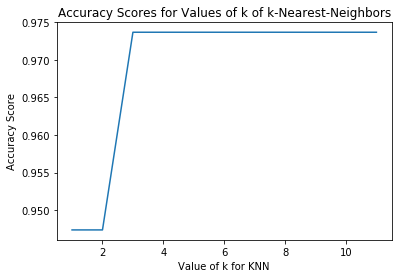

In [77]:
# experimenting with different n values
k_range = list(range(1,12))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [82]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
a = knn.predict([[6, 3, 4, 2]])
print(a)
b  = knn.predict([[1, 1,1, 1]])
print(b)

['Iris-versicolor']
['Iris-setosa']


In [84]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train, y_train)

y_pred = knn1.predict(X_test)

In [90]:
acc = metrics.accuracy_score(y_test, y_pred)
acc_per = acc*100
acc_per

97.36842105263158

In [86]:
knn1.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)